# test 1

In [1]:
import uproot
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('input_df/input_rho_rho.pkl')

In [3]:
df.columns

Index(['pi_E_1_br', 'pi_px_1_br', 'pi_py_1_br', 'pi_pz_1_br', 'pi_E_2_br',
       'pi_px_2_br', 'pi_py_2_br', 'pi_pz_2_br', 'pi0_E_1_br', 'pi0_px_1_br',
       'pi0_py_1_br', 'pi0_pz_1_br', 'pi0_E_2_br', 'pi0_px_2_br',
       'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br', 'rho_px_1_br',
       'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br', 'rho_px_2_br',
       'rho_py_2_br', 'rho_pz_2_br', 'aco_angle_1', 'y_1_1', 'y_1_2', 'w_a',
       'w_b', 'm_1', 'm_2'],
      dtype='object')

In [8]:
df.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,rho_px_2_br,rho_py_2_br,rho_pz_2_br,aco_angle_1,y_1_1,y_1_2,w_a,w_b,m_1,m_2
entry,,,,,,,,,,,,,,,,,,,,,
8,38.866249,0.429429,-0.133119,38.863398,40.456445,-0.509745,-0.094749,-40.452882,8.569687,-0.429429,...,2.442491e-14,5.329071e-14,-47.420221,2.657029,-0.637964,-0.708372,1.228852,0.950417,1.220952,1.512969
25,17.175150,0.213861,0.469040,17.166846,9.529103,0.210109,-0.089910,-9.525340,29.088943,-0.213861,...,5.329071e-15,-1.154632e-14,-46.250908,1.547246,0.254573,0.594557,0.124674,1.936855,1.104476,0.660891
27,8.526993,0.209425,0.197722,8.520985,10.630995,-0.242771,-0.036193,-10.627246,37.577339,-0.209425,...,2.131628e-14,7.105427e-15,-46.096978,3.750274,0.638590,0.529623,1.461517,0.400455,0.823420,0.669092
45,41.836730,-0.050458,-0.144726,41.836217,2.599469,0.099976,0.004286,-2.593793,11.395560,0.050458,...,4.352074e-14,-3.197442e-14,-53.229947,1.192612,-0.572846,0.899114,0.059870,0.061072,0.499415,0.796268
50,23.455746,0.115471,-0.337611,23.452617,25.232731,-0.068646,0.327903,-25.230121,21.066138,-0.115471,...,-1.143530e-14,-9.547918e-15,-44.515301,3.264792,-0.054617,-0.132105,0.654131,0.931771,0.765599,0.730365


In [9]:
%%time
np.c_[df.pi_E_1_br, df.pi_px_1_br]

Wall time: 10 ms


array([[3.88662492e+01, 4.29429408e-01],
       [1.71751504e+01, 2.13860954e-01],
       [8.52699315e+00, 2.09425230e-01],
       ...,
       [4.80889579e+01, 1.09017298e-01],
       [1.97226794e+00, 2.75777872e-02],
       [1.50065016e+01, 3.16749176e-01]])

# test 2 - need to know exact 4 vector to do boosts properly

In [2]:
import numpy as np
from pylorentz import Momentum4

In [12]:
def getP(mom4):
    arr = np.array([mom4.p_x, mom4.p_y, mom4.p_z])
    return arr/np.linalg.norm(arr)

In [36]:
p_1 = Momentum4(1,100,100,100)
p_2 = Momentum4(1,1,1,-1)
angle = np.arccos(getP(p_1).dot(getP(p_2)))
print(f'angle: {angle}')

angle: 1.2309594173407747


In [37]:
rest_frame = Momentum4(10,1,-1,1)
boost = Momentum4(rest_frame[0], -rest_frame[1], -rest_frame[2], -rest_frame[3])
p_1_boosted = p_1.boost_particle(boost)
p_2_boosted = p_2.boost_particle(boost)

In [38]:
angle_boost = np.arccos(getP(p_1_boosted).dot(getP(p_2_boosted)))
print(f'angle: {angle_boost}')

angle: 1.28273889442413


In [14]:
getP(p_1)

array([0.57735027, 0.57735027, 0.57735027])

## test 3 - getting rotated gen neutrinos

In [7]:
import uproot
import pandas as pd
import numpy as np
from pylorentz import Momentum4
m_tau = 1.776

In [7]:
variables = [
        "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand",
        "aco_angle_1", "aco_angle_5", "aco_angle_6", "aco_angle_7",
        "mva_dm_1", "mva_dm_2",
        "tau_decay_mode_1", "tau_decay_mode_2",
        "ip_x_1", "ip_y_1", "ip_z_1", "ip_x_2", "ip_y_2", "ip_z_2",  # ignore impact parameter for now
        "pi_E_1", "pi_px_1", "pi_py_1", "pi_pz_1",
        "pi_E_2", "pi_px_2", "pi_py_2", "pi_pz_2",
        "pi0_E_1", "pi0_px_1", "pi0_py_1", "pi0_pz_1",
        "pi0_E_2", "pi0_px_2", "pi0_py_2", "pi0_pz_2",
        "y_1_1", "y_1_2",
        'met', 'metx', 'mety',
        'metcov00', 'metcov01', 'metcov10', 'metcov11',
        #             'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2', 'sv_y_2','sv_z_2'
    ]
variables += ["gen_nu_p_1", "gen_nu_phi_1", "gen_nu_eta_1", #leading neutrino, gen level
            "gen_nu_p_2", "gen_nu_phi_2", "gen_nu_eta_2" #subleading neutrino, gen level
             ]
tree_tt = uproot.open("E:\Documents\Imperial\MSci_Project\MSci-Project-HiggsTauTau\shared\MVAFILE_AllHiggs_tt.root")["ntuple"]
df = tree_tt.pandas.df(variables)

In [9]:
df.columns

Index(['wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm', 'rand', 'aco_angle_1',
       'aco_angle_5', 'aco_angle_6', 'aco_angle_7', 'mva_dm_1', 'mva_dm_2',
       'tau_decay_mode_1', 'tau_decay_mode_2', 'ip_x_1', 'ip_y_1', 'ip_z_1',
       'ip_x_2', 'ip_y_2', 'ip_z_2', 'pi_E_1', 'pi_px_1', 'pi_py_1', 'pi_pz_1',
       'pi_E_2', 'pi_px_2', 'pi_py_2', 'pi_pz_2', 'pi0_E_1', 'pi0_px_1',
       'pi0_py_1', 'pi0_pz_1', 'pi0_E_2', 'pi0_px_2', 'pi0_py_2', 'pi0_pz_2',
       'y_1_1', 'y_1_2', 'met', 'metx', 'mety', 'metcov00', 'metcov01',
       'metcov10', 'metcov11', 'gen_nu_p_1', 'gen_nu_phi_1', 'gen_nu_eta_1',
       'gen_nu_p_2', 'gen_nu_phi_2', 'gen_nu_eta_2'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10103610 entries, 0 to 10103609
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   wt_cp_sm          float64
 1   wt_cp_ps          float64
 2   wt_cp_mm          float64
 3   rand              float64
 4   aco_angle_1       float64
 5   aco_angle_5       float64
 6   aco_angle_6       float64
 7   aco_angle_7       float64
 8   mva_dm_1          int32  
 9   mva_dm_2          int32  
 10  tau_decay_mode_1  int32  
 11  tau_decay_mode_2  int32  
 12  ip_x_1            float64
 13  ip_y_1            float64
 14  ip_z_1            float64
 15  ip_x_2            float64
 16  ip_y_2            float64
 17  ip_z_2            float64
 18  pi_E_1            float64
 19  pi_px_1           float64
 20  pi_py_1           float64
 21  pi_pz_1           float64
 22  pi_E_2            float64
 23  pi_px_2           float64
 24  pi_py_2           float64
 25  pi_pz_2           float64
 26  pi0_E_1     

In [12]:
df.to_pickle('../shared/misc/df_tt_rho_rho_withgen.pkl')

In [15]:
nu_1 = Momentum4.m_eta_phi_p(np.zeros(len(df["gen_nu_phi_1"])), df["gen_nu_eta_1"], df["gen_nu_phi_1"], df["gen_nu_p_1"])

C:\Users\Stanley\.conda\envs\msci\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
nu_1[3][nu_1[3] == 9999] = np.nan

In [17]:
df = pd.read_pickle('../shared/df_tt_rho_rho.pkl')
df = df[(df['mva_dm_1'] == 1) & (df['mva_dm_2'] == 1) & (df["tau_decay_mode_1"] == 1) & (df["tau_decay_mode_2"] == 1)]

In [18]:
df.shape

(998268, 40)

In [13]:
df = pd.read_pickle('../shared/misc/df_tt_rho_rho_withgen.pkl')
df1 = df[(df['mva_dm_1'] == 1) & (df['mva_dm_2'] == 1) & (df["tau_decay_mode_1"] == 1) & (df["tau_decay_mode_2"] == 1)]

In [11]:
df2 = pd.read_pickle('../stanley/df_saved/rho_rho/df_rho_rho.pkl')

In [14]:
df1.shape

(998268, 49)

In [12]:
df2.shape

(998268, 27)

In [15]:
df3 = pd.read_pickle('../shared/input_df_reco/input_rho_rho.pkl')

In [25]:
df3.shape

(998268, 31)

In [24]:
df3.columns

Index(['pi_E_1_br', 'pi_px_1_br', 'pi_py_1_br', 'pi_pz_1_br', 'pi_E_2_br',
       'pi_px_2_br', 'pi_py_2_br', 'pi_pz_2_br', 'pi0_E_1_br', 'pi0_px_1_br',
       'pi0_py_1_br', 'pi0_pz_1_br', 'pi0_E_2_br', 'pi0_px_2_br',
       'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br', 'rho_px_1_br',
       'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br', 'rho_px_2_br',
       'rho_py_2_br', 'rho_pz_2_br', 'aco_angle_1', 'y_1_1', 'y_1_2', 'w_a',
       'w_b', 'm_1', 'm_2'],
      dtype='object')

In [89]:
df = pd.read_pickle('../shared/misc/df_br.pkl')

In [90]:
df.columns

Index(['pi_E_1_br', 'pi_px_1_br', 'pi_py_1_br', 'pi_pz_1_br', 'pi_E_2_br',
       'pi_px_2_br', 'pi_py_2_br', 'pi_pz_2_br', 'pi0_E_1_br', 'pi0_px_1_br',
       'pi0_py_1_br', 'pi0_pz_1_br', 'pi0_E_2_br', 'pi0_px_2_br',
       'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br', 'rho_px_1_br',
       'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br', 'rho_px_2_br',
       'rho_py_2_br', 'rho_pz_2_br', 'aco_angle_1', 'y_1_1', 'y_1_2', 'w_a',
       'w_b', 'm_1', 'm_2', 'alpha_1', 'alpha_2', 'E_nu_1', 'E_nu_2',
       'p_t_nu_1', 'p_t_nu_2', 'p_z_nu_1', 'p_z_nu_2'],
      dtype='object')

In [31]:
df['flag'] = np.where( (df['p_t_nu_1']==-1) | (df['alpha_1']==-1) | (df['p_t_nu_2']==-1) | (df['alpha_2']==-1) | (df['E_nu_1']<0) | (df['E_nu_2']<0), 0, 1)

In [91]:
df.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,m_1,m_2,alpha_1,alpha_2,E_nu_1,E_nu_2,p_t_nu_1,p_t_nu_2,p_z_nu_1,p_z_nu_2
0,38.866249,0.429429,-0.133119,38.863398,40.456445,-0.509745,-0.094749,-40.452882,8.569687,-0.429429,...,1.220952,1.512969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,17.175150,0.213861,0.469040,17.166846,9.529103,0.210109,-0.089910,-9.525340,29.088943,-0.213861,...,1.104476,0.660891,1.405986,5.760983,65.030490,266.452856,0.555376,1.076724,65.028118,-266.450680
2,8.526993,0.209425,0.197722,8.520985,10.630995,-0.242771,-0.036193,-10.627246,37.577339,-0.209425,...,0.823420,0.669092,3.087533,0.720344,142.330104,33.231518,1.087236,1.310650,142.325951,-33.205662
3,41.836730,-0.050458,-0.144726,41.836217,2.599469,0.099976,0.004286,-2.593793,11.395560,0.050458,...,0.499415,0.796268,0.159950,0.776402,8.541043,41.346882,0.677451,1.254848,8.514134,-41.327836
4,23.455746,0.115471,-0.337611,23.452617,25.232731,-0.068646,0.327903,-25.230121,21.066138,-0.115471,...,0.765599,0.730365,2.691481,3.238841,119.823204,144.188002,1.632730,1.700731,119.812080,-144.177972


In [34]:
df['flag'].sum()/len(df['flag'])*100

0.02682503899753311

In [20]:
p_z_nu_1 = df.alpha_1[0]*(df.pi_pz_1_br[0] + df.pi0_pz_1_br[0])
i = 0
E_nu_1 = (125.18**2 - (df.pi_E_1_br[i] + df.pi0_E_1_br[i])**2 + (df.pi_pz_1_br[i] + df.pi0_pz_1_br[i])** 2 + 2*p_z_nu_1*(df.pi_pz_1_br[i] + df.pi0_pz_1_br[i]))/(2*(df.pi_E_1_br[i] + df.pi0_E_1_br[i]))
p_z_nu_1
E_nu_1

194.85291640160656

In [21]:
p_t_nu_1 = np.sqrt(np.array(E_nu_1)**2 - np.array(p_z_nu_1)**2)

<ipython-input-21-c4efc2a59d34>:1: RuntimeWarning: invalid value encountered in sqrt
  p_t_nu_1 = np.sqrt(np.array(E_nu_1)**2 - np.array(p_z_nu_1)**2)


In [22]:
np.abs(E_nu_1) < np.abs(p_z_nu_1)

True

In [3]:
alpha_1 = np.load('../shared/alpha_analysis/alpha_1_100_b.npy')

In [7]:
(alpha_1==-1).sum()

45671

### from previous runs

In [80]:
alpha_1_old = np.load('./alpha_analysis/alpha_1_1000.npy')
alpha_2_old = np.load('./alpha_analysis/alpha_2_1000.npy')

In [81]:
alpha_1_old.shape

(998268,)

In [82]:
df = pd.read_pickle('..\shared\input_df_reco\input_rho_rho.pkl')

In [83]:
df.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,rho_px_2_br,rho_py_2_br,rho_pz_2_br,aco_angle_1,y_1_1,y_1_2,w_a,w_b,m_1,m_2
entry,,,,,,,,,,,,,,,,,,,,,
8,38.866249,0.429429,-0.133119,38.863398,40.456445,-0.509745,-0.094749,-40.452882,8.569687,-0.429429,...,2.442491e-14,5.329071e-14,-47.420221,2.657029,-0.637964,-0.708372,1.228852,0.950417,1.220952,1.512969
25,17.175150,0.213861,0.469040,17.166846,9.529103,0.210109,-0.089910,-9.525340,29.088943,-0.213861,...,5.329071e-15,-1.154632e-14,-46.250908,1.547246,0.254573,0.594557,0.124674,1.936855,1.104476,0.660891
27,8.526993,0.209425,0.197722,8.520985,10.630995,-0.242771,-0.036193,-10.627246,37.577339,-0.209425,...,2.131628e-14,7.105427e-15,-46.096978,3.750274,0.638590,0.529623,1.461517,0.400455,0.823420,0.669092
45,41.836730,-0.050458,-0.144726,41.836217,2.599469,0.099976,0.004286,-2.593793,11.395560,0.050458,...,4.352074e-14,-3.197442e-14,-53.229947,1.192612,-0.572846,0.899114,0.059870,0.061072,0.499415,0.796268
50,23.455746,0.115471,-0.337611,23.452617,25.232731,-0.068646,0.327903,-25.230121,21.066138,-0.115471,...,-1.143530e-14,-9.547918e-15,-44.515301,3.264792,-0.054617,-0.132105,0.654131,0.931771,0.765599,0.730365


In [84]:

df['alpha_1'] = alpha_1_old
df['alpha_2'] = alpha_2_old
df['p_z_nu_1'] = alpha_1_old*(df.pi_pz_1_br + df.pi0_pz_1_br)
df['p_z_nu_2'] = alpha_2_old*(df.pi_pz_2_br + df.pi0_pz_2_br)
df['E_nu_1'] = (m_tau**2 - (df.pi_E_1_br+df.pi0_E_1_br)**2 + (df.pi_pz_1_br + df.pi0_pz_1_br)** 2 + 2*df.p_z_nu_1*(df.pi_pz_1_br + df.pi0_pz_1_br))/(2*(df.pi_E_1_br+df.pi0_E_1_br))
df['E_nu_2'] = (m_tau**2 - (df.pi_E_2_br+df.pi0_E_2_br)**2 + (df.pi_pz_2_br + df.pi0_pz_2_br)** 2 + 2*df.p_z_nu_2*(df.pi_pz_2_br + df.pi0_pz_2_br))/(2*(df.pi_E_2_br+df.pi0_E_2_br))
df['p_t_nu_1'] = np.sqrt(np.array(df.E_nu_1)**2 - np.array(df.p_z_nu_1)**2)
df['p_t_nu_2'] = np.sqrt(np.array(df.E_nu_2)**2 - np.array(df.p_z_nu_2)**2)
# df_red = df[(df['alpha_1'] > 0) & (df['alpha_2'] > 0) & (
#             df['E_nu_1'] > 0) & (df['E_nu_2'] > 0)].reset_index(drop=True)

df_red = df[(df['alpha_1'] > 0) & (df['alpha_2'] > 0) & (
            df['E_nu_1'] > 0) & (df['E_nu_2'] > 0) & (~np.isnan(df['p_t_nu_1'])) & (~np.isnan(df['p_t_nu_2']))].reset_index(drop=True)

<ipython-input-84-299a0640d27c>:8: RuntimeWarning: invalid value encountered in sqrt
  df['p_t_nu_1'] = np.sqrt(np.array(df.E_nu_1)**2 - np.array(df.p_z_nu_1)**2)
<ipython-input-84-299a0640d27c>:9: RuntimeWarning: invalid value encountered in sqrt
  df['p_t_nu_2'] = np.sqrt(np.array(df.E_nu_2)**2 - np.array(df.p_z_nu_2)**2)


In [85]:
df.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,m_1,m_2,alpha_1,alpha_2,p_z_nu_1,p_z_nu_2,E_nu_1,E_nu_2,p_t_nu_1,p_t_nu_2
entry,,,,,,,,,,,,,,,,,,,,,
8,38.866249,0.429429,-0.133119,38.863398,40.456445,-0.509745,-0.094749,-40.452882,8.569687,-0.429429,...,1.220952,1.512969,-1.000000,-1.000000,-47.420221,47.420221,-47.386977,-47.386986,NaN,NaN
25,17.175150,0.213861,0.469040,17.166846,9.529103,0.210109,-0.089910,-9.525340,29.088943,-0.213861,...,1.104476,0.660891,1.405986,5.760983,65.028118,-266.450680,65.030490,266.452856,0.555376,1.076724
27,8.526993,0.209425,0.197722,8.520985,10.630995,-0.242771,-0.036193,-10.627246,37.577339,-0.209425,...,0.823420,0.669092,7.170637,2.127554,330.544686,-98.073792,330.518818,98.092816,NaN,1.931799
45,41.836730,-0.050458,-0.144726,41.836217,2.599469,0.099976,0.004286,-2.593793,11.395560,0.050458,...,0.499415,0.796268,0.825470,9.321733,43.939720,-496.195347,43.965070,496.163508,1.492779,NaN
50,23.455746,0.115471,-0.337611,23.452617,25.232731,-0.068646,0.327903,-25.230121,21.066138,-0.115471,...,0.765599,0.730365,2.691481,3.238841,119.812080,-144.177972,119.823204,144.188002,1.632730,1.700731


In [86]:
print(df.shape, df_red.shape)

(998268, 39) (629235, 39)


### from old code on new file

In [35]:
df_old = pd.read_pickle('../shared/misc/df_br_old.pkl')

In [78]:
df_red = df_old[(df_old['alpha_1'] > 0) & (df_old['alpha_2'] > 0) & (
            df_old['E_nu_1'] > 0) & (df_old['E_nu_2'] > 0) & (~np.isnan(df_old['p_t_nu_1'])) & (~np.isnan(df_old['p_t_nu_2']))].reset_index(drop=True)

## testing current code with old code

In [12]:
alpha_1 = np.load('../shared/alpha_analysis/alpha_1_1000.npy')
alpha_2 = np.load('../shared/alpha_analysis/alpha_2_1000.npy')

In [13]:
df = pd.read_pickle('../shared/input_df_reco/input_rho_rho.pkl')

In [14]:
p_z_nu_1 = alpha_1*(df.pi_pz_1_br + df.pi0_pz_1_br)
p_z_nu_2 = alpha_2*(df.pi_pz_2_br + df.pi0_pz_2_br)
E_nu_1 = (m_tau**2 - (df.pi_E_1_br+df.pi0_E_1_br)**2 + (df.pi_pz_1_br + df.pi0_pz_1_br)
          ** 2 + 2*p_z_nu_1*(df.pi_pz_1_br + df.pi0_pz_1_br))/(2*(df.pi_E_1_br+df.pi0_E_1_br))
E_nu_2 = (m_tau**2 - (df.pi_E_2_br+df.pi0_E_2_br)**2 + (df.pi_pz_2_br + df.pi0_pz_2_br)
          ** 2 + 2*p_z_nu_2*(df.pi_pz_2_br + df.pi0_pz_2_br))/(2*(df.pi_E_2_br+df.pi0_E_2_br))
p_t_nu_1 = np.sqrt(np.array(E_nu_1)**2 - np.array(p_z_nu_1)**2)
p_t_nu_2 = np.sqrt(np.array(E_nu_2)**2 - np.array(p_z_nu_2)**2)
df['alpha_1'] = alpha_1
df['alpha_2'] = alpha_2
df['E_nu_1'] = E_nu_1
df['E_nu_2'] = E_nu_2
df['p_t_nu_1'] = p_t_nu_1
df['p_t_nu_2'] = p_t_nu_2
df['p_z_nu_1'] = p_z_nu_1
df['p_z_nu_2'] = p_z_nu_2
df_red = df[(df['alpha_1'] > 0) & (df['alpha_2'] > 0) & (
            df['E_nu_1'] > 0) & (df['E_nu_2'] > 0) & (~np.isnan(df['p_t_nu_1'])) & (~np.isnan(df['p_t_nu_2']))].reset_index(drop=True)

<ipython-input-14-5c75a7885f98>:7: RuntimeWarning: invalid value encountered in sqrt
  p_t_nu_1 = np.sqrt(np.array(E_nu_1)**2 - np.array(p_z_nu_1)**2)
<ipython-input-14-5c75a7885f98>:8: RuntimeWarning: invalid value encountered in sqrt
  p_t_nu_2 = np.sqrt(np.array(E_nu_2)**2 - np.array(p_z_nu_2)**2)


In [15]:
df.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,m_1,m_2,alpha_1,alpha_2,E_nu_1,E_nu_2,p_t_nu_1,p_t_nu_2,p_z_nu_1,p_z_nu_2
entry,,,,,,,,,,,,,,,,,,,,,
8,38.866249,0.429429,-0.133119,38.863398,40.456445,-0.509745,-0.094749,-40.452882,8.569687,-0.429429,...,1.220952,1.512969,-1.000000,-1.000000,-47.386977,-47.386986,NaN,NaN,-47.420221,47.420221
25,17.175150,0.213861,0.469040,17.166846,9.529103,0.210109,-0.089910,-9.525340,29.088943,-0.213861,...,1.104476,0.660891,1.405986,5.760983,65.030490,266.452856,0.555376,1.076724,65.028118,-266.450680
27,8.526993,0.209425,0.197722,8.520985,10.630995,-0.242771,-0.036193,-10.627246,37.577339,-0.209425,...,0.823420,0.669092,2.929308,0.525376,135.037562,24.245046,1.198206,1.139712,135.032246,-24.218243
45,41.836730,-0.050458,-0.144726,41.836217,2.599469,0.099976,0.004286,-2.593793,11.395560,0.050458,...,0.499415,0.796268,0.497134,1.975634,26.488511,105.174797,1.176025,1.582437,26.462392,-105.162891
50,23.455746,0.115471,-0.337611,23.452617,25.232731,-0.068646,0.327903,-25.230121,21.066138,-0.115471,...,0.765599,0.730365,2.691481,3.238841,119.823204,144.188002,1.632730,1.700731,119.812080,-144.177972


In [16]:
df_red.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,m_1,m_2,alpha_1,alpha_2,E_nu_1,E_nu_2,p_t_nu_1,p_t_nu_2,p_z_nu_1,p_z_nu_2
0,17.175150,0.213861,0.469040,17.166846,9.529103,0.210109,-0.089910,-9.525340,29.088943,-0.213861,...,1.104476,0.660891,1.405986,5.760983,65.030490,266.452856,0.555376,1.076724,65.028118,-266.450680
1,8.526993,0.209425,0.197722,8.520985,10.630995,-0.242771,-0.036193,-10.627246,37.577339,-0.209425,...,0.823420,0.669092,2.929308,0.525376,135.037562,24.245046,1.198206,1.139712,135.032246,-24.218243
2,41.836730,-0.050458,-0.144726,41.836217,2.599469,0.099976,0.004286,-2.593793,11.395560,0.050458,...,0.499415,0.796268,0.497134,1.975634,26.488511,105.174797,1.176025,1.582437,26.462392,-105.162891
3,23.455746,0.115471,-0.337611,23.452617,25.232731,-0.068646,0.327903,-25.230121,21.066138,-0.115471,...,0.765599,0.730365,2.691481,3.238841,119.823204,144.188002,1.632730,1.700731,119.812080,-144.177972
4,5.760700,0.068916,0.228395,5.754067,21.168171,-0.077786,0.321893,-21.165121,36.728783,-0.068916,...,0.806553,0.716946,1.007152,0.049665,42.807425,2.140627,1.364509,0.361641,42.785672,-2.109857


In [17]:
print(df.shape, df_red.shape)

(998268, 39) (862747, 39)


In [21]:
debug = pd.read_pickle('../shared/misc/debugging.pkl')

In [22]:
debug.head()

,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,aco_angle_1,mva_dm_1,mva_dm_2,tau_decay_mode_1,tau_decay_mode_2,pi_E_1,...,pi0_py_2_br,pi0_pz_2_br,rho_E_1_br,rho_px_1_br,rho_py_1_br,rho_pz_1_br,rho_E_2_br,rho_px_2_br,rho_py_2_br,rho_pz_2_br
0,1.461517,0.400455,0.172710,0.132842,3.750274,1,1,1,1,15.319610,...,-0.613245,-31.758861,-51.486336,8.881784e-16,1.998401e-15,51.479751,-41.285669,0.236660,-0.674888,-41.274051
1,1.039988,1.032860,1.851815,0.273736,3.907006,1,1,1,1,11.713255,...,-0.548184,-19.068177,-72.112911,0.000000e+00,0.000000e+00,72.108722,-34.290218,0.050935,-0.555864,-34.277111
2,1.233705,0.818909,1.977420,0.476740,1.669376,1,1,1,1,32.092762,...,0.166618,-37.136456,-52.754167,0.000000e+00,0.000000e+00,52.747636,-54.930906,-1.486436,0.508467,-54.901333
3,0.637660,1.573227,1.411204,0.210112,6.073213,1,1,1,1,28.916900,...,0.072026,-8.164366,-75.087131,6.217249e-15,-7.105427e-15,75.082471,-31.822398,0.127009,0.079273,-31.814351
4,1.413101,0.418718,1.671304,0.351982,2.413196,1,1,1,1,33.761218,...,-0.070942,-8.672484,-44.943796,3.552714e-15,-3.552714e-15,44.932405,-41.078243,-0.449991,-0.178526,-41.073657


In [23]:
debug.shape

(987883, 64)

In [24]:
debug_2 = pd.read_pickle('../shared/misc/debugging_2.pkl')

In [26]:
debug_2.columns

Index(['wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm', 'rand', 'aco_angle_1', 'mva_dm_1',
       'mva_dm_2', 'tau_decay_mode_1', 'tau_decay_mode_2', 'pi_E_1', 'pi_px_1',
       'pi_py_1', 'pi_pz_1', 'pi_E_2', 'pi_px_2', 'pi_py_2', 'pi_pz_2',
       'pi0_E_1', 'pi0_px_1', 'pi0_py_1', 'pi0_pz_1', 'pi0_E_2', 'pi0_px_2',
       'pi0_py_2', 'pi0_pz_2', 'y_1_1', 'y_1_2', 'met', 'metx', 'mety',
       'metcov00', 'metcov01', 'metcov10', 'metcov11', 'gen_nu_p_1',
       'gen_nu_phi_1', 'gen_nu_eta_1', 'gen_nu_p_2', 'gen_nu_phi_2',
       'gen_nu_eta_2', 'pi_E_1_br', 'pi_px_1_br', 'pi_py_1_br', 'pi_pz_1_br',
       'pi_E_2_br', 'pi_px_2_br', 'pi_py_2_br', 'pi_pz_2_br', 'pi0_E_1_br',
       'pi0_px_1_br', 'pi0_py_1_br', 'pi0_pz_1_br', 'pi0_E_2_br',
       'pi0_px_2_br', 'pi0_py_2_br', 'pi0_pz_2_br', 'rho_E_1_br',
       'rho_px_1_br', 'rho_py_1_br', 'rho_pz_1_br', 'rho_E_2_br',
       'rho_px_2_br', 'rho_py_2_br', 'rho_pz_2_br'],
      dtype='object')

In [25]:
debug_2.head()

,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,aco_angle_1,mva_dm_1,mva_dm_2,tau_decay_mode_1,tau_decay_mode_2,pi_E_1,...,pi0_py_2_br,pi0_pz_2_br,rho_E_1_br,rho_px_1_br,rho_py_1_br,rho_pz_1_br,rho_E_2_br,rho_px_2_br,rho_py_2_br,rho_pz_2_br
entry,,,,,,,,,,,,,,,,,,,,,
8,1.228852,0.950417,0.223672,0.861532,2.657029,1,1,1,1,45.423448,...,-0.489717,-6.827801,-48.396094,0.000000e+00,0.000000e+00,48.380690,-46.503688,-0.146724,-0.242363,-46.478206
25,0.124674,1.936855,1.318387,0.932849,1.547246,1,1,1,1,24.506373,...,-2.249592,-49.257639,-34.479200,-3.552714e-15,8.881784e-16,34.461506,-62.102037,-0.805666,-2.640589,-62.037121
27,1.461517,0.400455,0.172710,0.132842,3.750274,1,1,1,1,15.319610,...,-0.613245,-31.758861,-51.486336,8.881784e-16,1.998401e-15,51.479751,-41.285669,0.236660,-0.674888,-41.274051
45,0.059870,0.061072,0.111744,0.514073,1.192612,1,1,1,1,94.211361,...,0.701113,-203.232803,-13.266762,0.000000e+00,4.440892e-16,13.257358,-213.677406,2.939886,0.825638,-213.654102
50,0.654131,0.931771,0.072470,0.504356,3.264792,1,1,1,1,25.899289,...,-0.135397,-18.593498,-46.177841,-3.552714e-15,-2.664535e-15,46.171494,-42.924776,0.010702,0.083694,-42.918479


In [35]:
debug_2.pi_E_1_br

entry
8          -39.653200
25         -12.790632
27          -9.520570
45         -10.423361
50         -24.327998
              ...    
10103549   -19.654014
10103574   -41.752335
10103592   -23.212051
10103593    -7.435913
10103602   -18.837610
Name: pi_E_1_br, Length: 998268, dtype: float64

In [36]:
input_df = pd.read_pickle('../shared/input_df_reco/input_rho_rho.pkl')

In [37]:
input_df.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,rho_px_2_br,rho_py_2_br,rho_pz_2_br,aco_angle_1,y_1_1,y_1_2,w_a,w_b,m_1,m_2
entry,,,,,,,,,,,,,,,,,,,,,
8,-39.653200,0.375426,-0.247354,39.650405,-39.653200,-0.375426,0.247354,-39.650405,-8.742894,-0.375426,...,-0.146724,-0.242363,-46.478206,2.657029,-0.637964,-0.708372,1.228852,0.950417,1.220952,1.512969
25,-12.790632,0.335798,0.390997,12.779482,-12.790632,-0.335798,-0.390997,-12.779482,-21.688568,-0.335798,...,-0.805666,-2.640589,-62.037121,1.547246,0.254573,0.594557,0.124674,1.936855,1.104476,0.660891
27,-9.520570,-0.281322,0.061643,9.515190,-9.520570,0.281322,-0.061643,-9.515190,-41.965766,0.281322,...,0.236660,-0.674888,-41.274051,3.750274,0.638590,0.529623,1.461517,0.400455,0.823420,0.669092
45,-10.423361,-0.089411,-0.124524,10.421299,-10.423361,0.089411,0.124524,-10.421299,-2.843401,0.089411,...,2.939886,0.825638,-213.654102,1.192612,-0.572846,0.899114,0.059870,0.061072,0.499415,0.796268
50,-24.327998,0.281627,-0.219091,24.324981,-24.327998,-0.281627,0.219091,-24.324981,-21.849843,-0.281627,...,0.010702,0.083694,-42.918479,3.264792,-0.054617,-0.132105,0.654131,0.931771,0.765599,0.730365


In [38]:
input_df = pd.read_pickle('../shared/input_df_reco/input_rho_rho.pkl')

In [39]:
input_df.head()

,pi_E_1_br,pi_px_1_br,pi_py_1_br,pi_pz_1_br,pi_E_2_br,pi_px_2_br,pi_py_2_br,pi_pz_2_br,pi0_E_1_br,pi0_px_1_br,...,rho_px_2_br,rho_py_2_br,rho_pz_2_br,aco_angle_1,y_1_1,y_1_2,w_a,w_b,m_1,m_2
entry,,,,,,,,,,,,,,,,,,,,,
8,38.866249,0.429429,-0.133119,38.863398,40.456445,-0.509745,-0.094749,-40.452882,8.569687,-0.429429,...,2.442491e-14,5.329071e-14,-47.420221,2.657029,-0.637964,-0.708372,1.228852,0.950417,1.220952,1.512969
25,17.175150,0.213861,0.469040,17.166846,9.529103,0.210109,-0.089910,-9.525340,29.088943,-0.213861,...,5.329071e-15,-1.154632e-14,-46.250908,1.547246,0.254573,0.594557,0.124674,1.936855,1.104476,0.660891
27,8.526993,0.209425,0.197722,8.520985,10.630995,-0.242771,-0.036193,-10.627246,37.577339,-0.209425,...,2.131628e-14,7.105427e-15,-46.096978,3.750274,0.638590,0.529623,1.461517,0.400455,0.823420,0.669092
45,41.836730,-0.050458,-0.144726,41.836217,2.599469,0.099976,0.004286,-2.593793,11.395560,0.050458,...,4.352074e-14,-3.197442e-14,-53.229947,1.192612,-0.572846,0.899114,0.059870,0.061072,0.499415,0.796268
50,23.455746,0.115471,-0.337611,23.452617,25.232731,-0.068646,0.327903,-25.230121,21.066138,-0.115471,...,-1.143530e-14,-9.547918e-15,-44.515301,3.264792,-0.054617,-0.132105,0.654131,0.931771,0.765599,0.730365


## test 4 - playing around with eqn 26

In [1]:
import numpy as np
import pandas as pd
import uproot
from pylorentz import Momentum4
import matplotlib.pyplot as plt
m_tau = 1.776

In [3]:
variables_a1_a1_gen = [
    "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand",
    "dm_1", "dm_2",
    "pi_E_1", "pi_px_1", "pi_py_1", "pi_pz_1",
    "pi_E_2", "pi_px_2", "pi_py_2", "pi_pz_2",
    "pi2_E_1", "pi2_px_1", "pi2_py_1", "pi2_pz_1",
    "pi3_E_1", "pi3_px_1", "pi3_py_1", "pi3_pz_1",
    "pi2_px_2", "pi2_py_2", "pi2_pz_2", "pi2_E_2",
    "pi3_px_2", "pi3_py_2", "pi3_pz_2", "pi3_E_2",
    "sv_x_1", "sv_y_1", "sv_z_1",
    "sv_x_2", "sv_y_2", "sv_z_2",]
tree_tt_gen = uproot.open("./MVAFILE_GEN_AllHiggs_tt.root")["ntuple"]
df_gen = tree_tt_gen.pandas.df(variables_a1_a1_gen)
df_gen.to_pickle(f"../shared/df_tt_a1_a1_gen.pkl")

In [223]:
tree_tt_gen = uproot.open("./MVAFILE_GEN_AllHiggs_tt.root")["ntuple"]
tree_tt_gen.keys()

[b'rand',
 b'wt_cp_sm',
 b'wt_cp_ps',
 b'wt_cp_mm',
 b'pi_px_1',
 b'pi_py_1',
 b'pi_pz_1',
 b'pi_E_1',
 b'pi2_px_1',
 b'pi2_py_1',
 b'pi2_pz_1',
 b'pi2_E_1',
 b'pi3_px_1',
 b'pi3_py_1',
 b'pi3_pz_1',
 b'pi3_E_1',
 b'pi_px_2',
 b'pi_py_2',
 b'pi_pz_2',
 b'pi_E_2',
 b'pi2_px_2',
 b'pi2_py_2',
 b'pi2_pz_2',
 b'pi2_E_2',
 b'pi3_px_2',
 b'pi3_py_2',
 b'pi3_pz_2',
 b'pi3_E_2',
 b'pi0_px_1',
 b'pi0_py_1',
 b'pi0_pz_1',
 b'pi0_E_1',
 b'pi0_px_2',
 b'pi0_py_2',
 b'pi0_pz_2',
 b'pi0_E_2',
 b'sv_x_1',
 b'sv_y_1',
 b'sv_z_1',
 b'sv_x_2',
 b'sv_y_2',
 b'sv_z_2',
 b'dm_1',
 b'dm_2',
 b'metx',
 b'mety']

In [2]:
df_gen = pd.read_pickle(f"../shared/df_tt_a1_a1_gen.pkl")

In [3]:
df_gen = df_gen[(df_gen['dm_1']==10) & (df_gen['dm_2']==10)]

In [4]:
df_gen = df_gen[(df_gen != 0).all(1)]

In [5]:
df_gen.head()

,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,dm_1,dm_2,pi_E_1,pi_px_1,pi_py_1,pi_pz_1,...,pi3_px_2,pi3_py_2,pi3_pz_2,pi3_E_2,sv_x_1,sv_y_1,sv_z_1,sv_x_2,sv_y_2,sv_z_2
entry,,,,,,,,,,,,,,,,,,,,,
4,0.370084,1.765682,1.648769,0.604970,10.0,10.0,5.500041,-4.350674,-2.053902,2.661596,...,18.922930,14.962322,51.630464,56.988356,-0.304889,-0.132517,0.176034,0.196662,0.151155,0.536159
12,0.403054,1.167738,0.118793,0.231651,10.0,10.0,123.374205,-10.398425,-26.224208,-120.105531,...,7.899818,13.353715,-39.166945,42.128350,-0.197811,-0.480520,-2.195279,0.328749,0.542358,-1.582369
15,0.203289,1.797292,0.414664,0.092664,10.0,10.0,41.659845,31.126593,-18.033808,-21.010477,...,-10.737736,8.762232,-17.359090,22.213356,0.743963,-0.425858,-0.487649,-0.123903,0.107171,-0.210013
35,0.115375,1.037540,0.438237,0.959867,10.0,10.0,8.222886,3.935378,7.009589,1.724771,...,-0.648446,-2.330409,1.933605,3.099934,0.335032,0.625689,0.139962,-0.073669,-0.218105,0.183014
36,0.412547,1.816359,1.537121,0.533256,10.0,10.0,22.797583,-14.755482,16.665252,4.924980,...,8.309163,-8.998389,-17.413945,21.290330,-0.147090,0.161241,0.041281,0.090535,-0.101023,-0.196908


In [156]:
variables_a1_a1 = [
    "wt_cp_sm", "wt_cp_ps", "wt_cp_mm", "rand",
    "aco_angle_1",
    "mva_dm_1", "mva_dm_2",
    "tau_decay_mode_1", "tau_decay_mode_2",
    "pi_E_1", "pi_px_1", "pi_py_1", "pi_pz_1",
    "pi_E_2", "pi_px_2", "pi_py_2", "pi_pz_2",
    "pi2_E_1", "pi2_px_1", "pi2_py_1", "pi2_pz_1",
    "pi3_E_1", "pi3_px_1", "pi3_py_1", "pi3_pz_1",
    "pi2_px_2", "pi2_py_2", "pi2_pz_2", "pi2_E_2",
    "pi3_px_2", "pi3_py_2", "pi3_pz_2", "pi3_E_2",
#     "ip_x_1", "ip_y_1", "ip_z_1",
#     "ip_x_2", "ip_y_2", "ip_z_2",
    "sv_x_1", "sv_y_1", "sv_z_1",
    "sv_x_2", "sv_y_2", "sv_z_2",
    "gen_nu_p_1", "gen_nu_phi_1", "gen_nu_eta_1",  # leading neutrino, gen level
    "gen_nu_p_2", "gen_nu_phi_2", "gen_nu_eta_2"  # subleading neutrino, gen level
    ]

reco_root_path = "./MVAFILE_AllHiggs_tt.root"
tree_tt = uproot.open(reco_root_path)["ntuple"]
df = tree_tt.pandas.df(variables_a1_a1)
df.to_pickle(f"../shared/df_tt_a1_a1.pkl")

In [6]:
df = pd.read_pickle(f"../shared/df_tt_a1_a1.pkl")

In [7]:
df = df[(df['mva_dm_1']==10) & (df['mva_dm_2']==10)]

In [8]:
df.head()

,wt_cp_sm,wt_cp_ps,wt_cp_mm,rand,aco_angle_1,mva_dm_1,mva_dm_2,tau_decay_mode_1,tau_decay_mode_2,pi_E_1,...,sv_z_1,sv_x_2,sv_y_2,sv_z_2,gen_nu_p_1,gen_nu_phi_1,gen_nu_eta_1,gen_nu_p_2,gen_nu_phi_2,gen_nu_eta_2
entry,,,,,,,,,,,,,,,,,,,,,
1,0.370084,1.765682,1.648769,0.604970,6.117143,10,10,10,10,5.463920,...,0.178732,0.224309,0.175644,0.615207,12.439656,-2.694677,0.498218,27.497826,0.621760,1.525403
3,0.203289,1.797292,0.414664,0.092664,3.297071,10,10,10,10,39.206211,...,-0.530272,-0.066309,0.058633,-0.109475,2.536093,-0.428295,-0.487515,9.252467,2.453116,-1.111630
12,0.412547,1.816359,1.537121,0.533256,0.924842,10,10,11,10,30.358725,...,-0.164217,-0.155510,0.175243,0.051742,18.037537,-0.796603,-1.167675,8.062246,2.322562,0.143439
13,1.000000,1.000000,1.000000,0.666072,3.661648,10,10,10,10,19.221223,...,-0.049048,-1.102329,-1.106432,0.026094,17.809995,-0.010321,0.504604,2.451051,-2.454931,0.060119
32,1.000000,1.000000,1.000000,0.960308,4.637460,10,10,10,10,33.953942,...,-0.006299,-0.056976,0.109527,-0.009077,5.152344,-1.097308,0.062317,8.930094,2.108329,-0.016631


In [96]:
(df.gen_nu_eta_1==9999).sum()

0

In [10]:
# df = df[(df['pi_E_1']!=0) & (df['pi_E_2']!=0) ]

In [11]:
df = df[(df != 0).all(1)]

In [187]:
df = df[(df != -9999).all(1)]

In [188]:
def get_a1_info(df):
    pi_1 = Momentum4(df['pi_E_1'], df['pi_px_1'], df['pi_py_1'], df['pi_pz_1'])
    pi2_1 = Momentum4(df['pi2_E_1'], df['pi2_px_1'], df['pi2_py_1'], df['pi2_pz_1'])
    pi3_1 = Momentum4(df['pi3_E_1'], df['pi3_px_1'], df['pi3_py_1'], df['pi3_pz_1'])
    pi_2 = Momentum4(df['pi_E_2'], df['pi_px_2'], df['pi_py_2'], df['pi_pz_2'])
    pi2_2 = Momentum4(df['pi2_E_2'], df['pi2_px_2'], df['pi2_py_2'], df['pi2_pz_2'])
    pi3_2 = Momentum4(df['pi3_E_2'], df['pi3_px_2'], df['pi3_py_2'], df['pi3_pz_2'])
    a1_1 = pi_1 + pi3_1 + pi2_1
    a1_2 = pi_2 + pi3_2 + pi2_2

    # ip_1 = np.c_[df['ip_x_1'], df['ip_y_1'], df['ip_z_1']]
    sv_1 = np.c_[df['sv_x_1'], df['sv_y_1'], df['sv_z_1']]
    # ip_2 = np.c_[df['ip_x_2'], df['ip_y_2'], df['ip_z_2']]
    sv_2 = np.c_[df['sv_x_2'], df['sv_y_2'], df['sv_z_2']]
    a1_1_p = np.c_[a1_1.p_x, a1_1.p_y, a1_1.p_z]
    a1_2_p = np.c_[a1_2.p_x, a1_2.p_y, a1_2.p_z]

    # tau_vec = np.c_[]

    # found some 0s in a1_1_p - now fixed via cleaning
    a1_1_p_norm = a1_1_p/np.sqrt((a1_1_p ** 2).sum(-1))[..., np.newaxis]
    a1_2_p_norm = a1_2_p/np.sqrt((a1_2_p ** 2).sum(-1))[..., np.newaxis]
    sv_1_norm = sv_1/np.sqrt((sv_1 ** 2).sum(-1))[..., np.newaxis]
    sv_2_norm = sv_2/np.sqrt((sv_2 ** 2).sum(-1))[..., np.newaxis]

    m_1 = a1_1.m
    m_2 = a1_2.m

    theta_1 = np.arccos(np.einsum('ij, ij->i', a1_1_p_norm, sv_1_norm))
    theta_2 = np.arccos(np.einsum('ij, ij->i', a1_2_p_norm, sv_2_norm))
    return m_1, m_2, a1_1, a1_2, theta_1, theta_2
m_1, m_2, a1_1, a1_2, theta_1, theta_2 = get_a1_info(df)

In [189]:
# theta filtering
max_theta_1 = np.arcsin((m_tau**2-m_1**2)/(2*m_tau*a1_1.p))
max_theta_2 = np.arcsin((m_tau**2-m_2**2)/(2*m_tau*a1_2.p))
idx1 = max_theta_1<theta_1
idx2 = max_theta_2<theta_2
theta_1_f = theta_1
theta_2_f = theta_2
theta_1_f[idx1] = max_theta_1[idx1]
theta_2_f[idx2] = max_theta_2[idx2]

In [21]:
theta_1, max_theta_1

(array([0.00834322, 0.00715157, 0.00668177, ..., 0.00187012, 0.00247809,
        0.01412954]),
 array([0.00834322, 0.00715157, 0.00668177, ..., 0.00187012, 0.00247809,
        0.01412954]))

In [190]:
def paper_solution(m, p, theta):
    # p is the magnitude
    a = (m**2+m_tau**2)*p*np.cos(theta)
    d = ((m**2-m_tau**2)**2-4*m_tau**2*p**2*np.sin(theta)**2)
    d = np.round(d, 14) # for floating point error
    b = np.sqrt((m**2+p**2)*d)
    c = 2*(m**2+p**2*np.sin(theta)**2)
    return (a+b)/c, (a-b)/c

def my_solution(m, p, theta):
    a = -4*(m**2+p**2*np.sin(theta)**2)
    b = 8*p**3*np.cos(theta) + 4*p*np.cos(theta)*(m_tau**2-m**2) + 8*p*(m_tau**2+p**2)
#     c = (m**2-m_tau**2)**2-4*p**2*(m**2+m_tau**2)
    c = m_tau**4+m**4+4*p**4-2*m**2*m_tau**2-4*(m**2+p**2)*p**2-4*p**2*(m_tau**2-m**2) 
    return (-b + np.sqrt(b**2-4*a*c))/(2*a), (-b - np.sqrt(b**2-4*a*c))/(2*a)
#     return np.roots([a,b,c])

def test(m, p, theta):
    return ((m**2-m_tau**2)**2-4*m_tau**2*p**2*np.sin(theta)**2)

def wolfram(m, p, theta):
    a = m_tau**2
    b = m**2
    c = m**2+p**2
    d = p
    e = np.cos(theta)
    return (-a**2+b**2-2*c*d+2*d**2)/(2*(e*d-c)), (-a**2+b**2+2*c*d+2*d**2)/(2*(c+e*d))

In [49]:
from scipy import stats
stats.describe(np.round(test(m_1, a1_1.p, theta_1), 14))

DescribeResult(nobs=348427, minmax=(0.0, 9.05124689436282), mean=0.7356731495923835, variance=1.5838708216991852, skewness=1.7507648841216013, kurtosis=2.286091524541985)

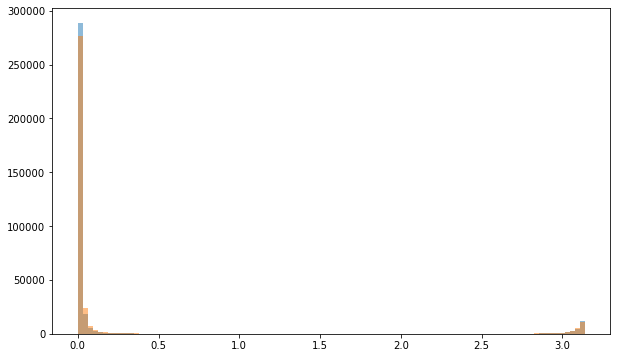

In [110]:
plt.figure(figsize=(10,6))
plt.hist(theta_1, bins=100, alpha=0.5)
plt.hist(theta_2, bins=100, alpha=0.5)
plt.show()

In [191]:
def get_closest_soln(sol, mode=0):
    m_higgs = 125
    closest_soln = []
    
    for i in range(len(sol)):
        if mode == 0:
            solutions = np.array(sol[i])
            distances = np.abs(solutions-m_higgs)
            try:
                ans = solutions[np.nanargmin(distances)]
            except ValueError as e:
                continue
            closest_soln.append(ans)
    #         closest_soln.append(solutions[np.nanargmin(distances)])
        elif mode == 1:
            closest_soln.append(max(sol[i][0], sol[i][1]))
        elif mode == 2:
            closest_soln.append(min(sol[i][0], sol[i][1]))
        if i%100000==0:
            print(f'getting {i}')
#         if ans < 1:
#             print(solutions)
    return closest_soln

In [192]:
sol1_p = paper_solution(m_1, a1_1.p, theta_1_f)
sol2_p = paper_solution(m_2, a1_2.p, theta_2_f)
closest_p_1 = get_closest_soln(np.array(sol1_p).T)
closest_p_2 = get_closest_soln(np.array(sol2_p).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 0
getting 100000
getting 200000
getting 300000


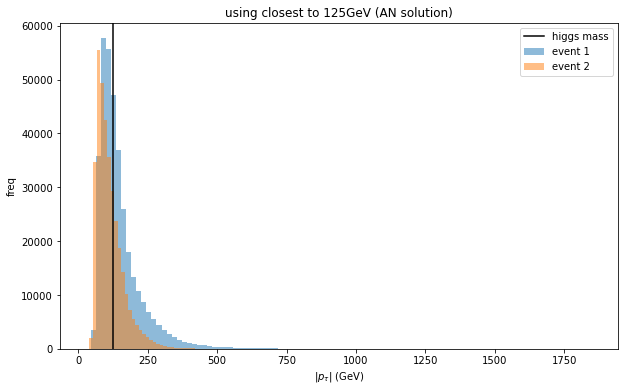

In [63]:
plt.figure(figsize=(10,6))
plt.hist(closest_p_1, bins=100, alpha=0.5, label='event 1')
plt.hist(closest_p_2, bins=100, alpha=0.5, label='event 2')
plt.axvline(125, color='black', label='higgs mass')
plt.legend()
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
plt.title('using closest to 125GeV (AN solution)')
plt.savefig('./tau_reconstruction/reco_2.png')
plt.show()

In [193]:
sol1 = my_solution(m_1, a1_1.p, theta_1)
sol2 = my_solution(m_2, a1_2.p, theta_2)
sol = np.c_[np.array(sol1).T, np.array(sol2).T]
closest_soln_one = get_closest_soln(sol)

getting 0
getting 100000
getting 200000
getting 300000


In [194]:
sol1_w = wolfram(m_1, a1_1.p, theta_1)
closest_w_1 = get_closest_soln(np.array(sol1_w).T)
sol2_w = wolfram(m_2, a1_2.p, theta_2)
closest_w_2 = get_closest_soln(np.array(sol2_w).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 0
getting 100000
getting 200000
getting 300000


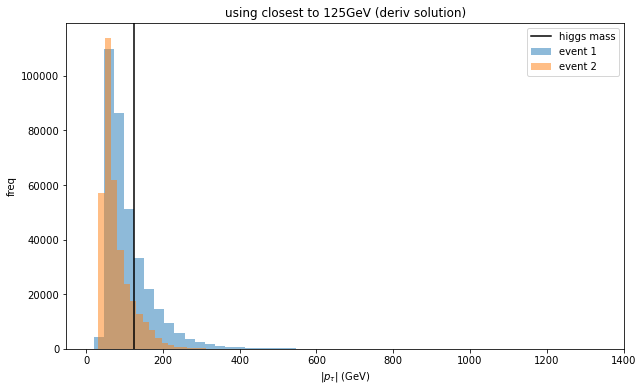

In [67]:
plt.figure(figsize=(10,6))
plt.hist(closest_w_1, bins=50, alpha=0.5, label='event 1')
plt.hist(closest_w_2, bins=50, alpha=0.5, label='event 2')
plt.axvline(125, color='black', label='higgs mass')
plt.legend()
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
plt.title('using closest to 125GeV (deriv solution)')
plt.savefig('./tau_reconstruction/reco_1.png')
plt.show()

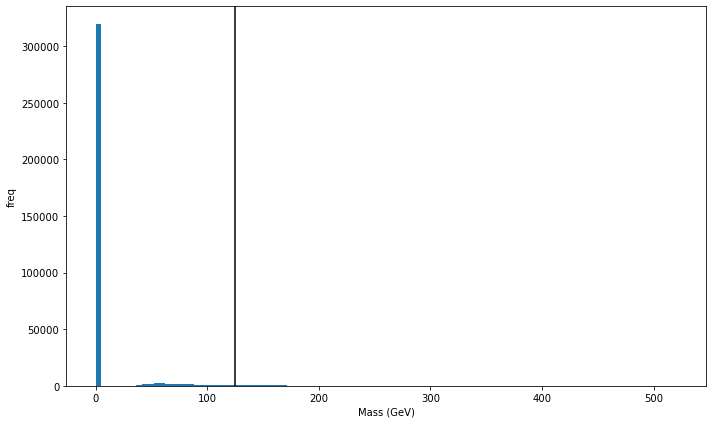

In [14]:
plt.figure(figsize=(10,6))
plt.hist(closest_soln_one, bins=100)
plt.axvline(125, color='black')
plt.xlabel('Mass (GeV)')
plt.ylabel('freq')
plt.tight_layout()
plt.show()

In [16]:
closest_soln_two_1 = get_closest_soln(np.array(sol1).T)
closest_soln_two_2 = get_closest_soln(np.array(sol2).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 0
getting 100000
getting 200000
getting 300000


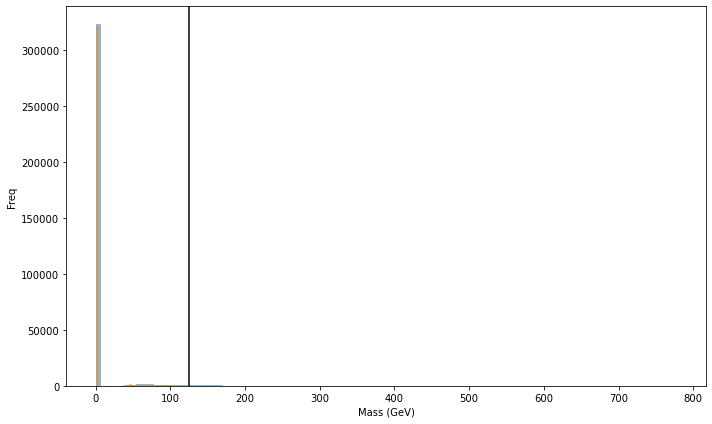

In [17]:
plt.figure(figsize=(10,6))
plt.hist(closest_soln_two_1, bins=100, alpha=0.5, label='event 1')
plt.hist(closest_soln_two_2, bins=100, alpha=0.5, label='event 2')
plt.axvline(125, color='black')
plt.xlabel('Mass (GeV)')
plt.ylabel('Freq')
plt.tight_layout()
plt.show()

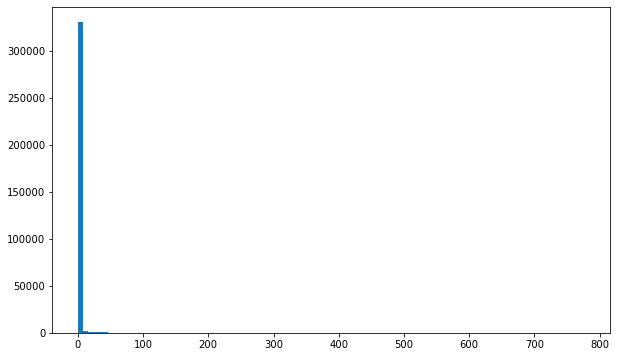

In [33]:
plt.figure(figsize=(10,6))
plt.hist(sol1[0], bins=100)
plt.show()

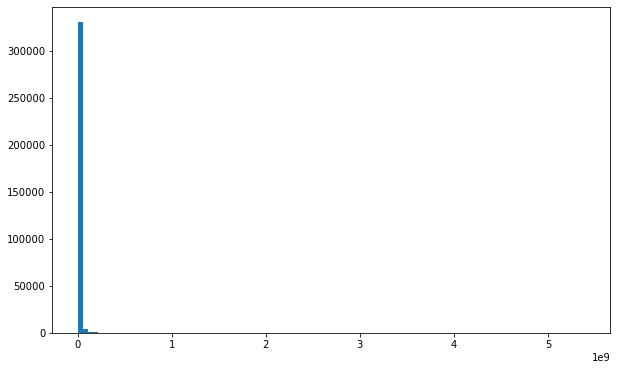

In [36]:
plt.figure(figsize=(10,6))
plt.hist(sol1[1], bins=100)
plt.show()

In [45]:
np.mean(sol1[1][~np.isnan(sol1[1])])

6999159.608838446

### now gen level

In [83]:
# now gen level
m_1_gen, m_2_gen, a1_1_gen, a1_2_gen, theta_1_gen, theta_2_gen = get_a1_info(df_gen)
max_theta_1_gen = np.arcsin((m_tau**2-m_1_gen**2)/(2*m_tau*a1_1_gen.p))
max_theta_2_gen = np.arcsin((m_tau**2-m_2_gen**2)/(2*m_tau*a1_2_gen.p))
theta_1_gen[max_theta_1_gen<theta_1_gen] = max_theta_1_gen[max_theta_1_gen<theta_1_gen]
theta_2_gen[max_theta_2_gen<theta_2_gen] = max_theta_2_gen[max_theta_2_gen<theta_2_gen]

<ipython-input-83-67773bc513c1>:3: RuntimeWarning: invalid value encountered in arcsin
  max_theta_1_gen = np.arcsin((m_tau**2-m_1_gen**2)/(2*m_tau*a1_1_gen.p))
<ipython-input-83-67773bc513c1>:4: RuntimeWarning: invalid value encountered in arcsin
  max_theta_2_gen = np.arcsin((m_tau**2-m_2_gen**2)/(2*m_tau*a1_2_gen.p))


In [46]:
sol1_gen = my_solution(m_1_gen, a1_1_gen.p, theta_1_gen)
sol2_gen = my_solution(m_2_gen, a1_2_gen.p, theta_2_gen)
sol_gen = np.c_[np.array(sol1_gen).T, np.array(sol2_gen).T]
closest_soln_one_gen = get_closest_soln(sol_gen)

getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000


In [84]:
sol1_gen_p = paper_solution(m_1_gen, a1_1_gen.p, theta_1_gen)
sol2_gen_p = paper_solution(m_2_gen, a1_2_gen.p, theta_2_gen)
closest_soln_1_gen_p = get_closest_soln(np.array(sol1_gen_p).T)
closest_soln_2_gen_p = get_closest_soln(np.array(sol2_gen_p).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000
getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000


In [75]:
sol1_gen_w = wolfram(m_1_gen, a1_1_gen.p, theta_1_gen)
sol2_gen_w = wolfram(m_2_gen, a1_2_gen.p, theta_2_gen)
closest_soln_1_gen_w = get_closest_soln(np.array(sol1_gen_w).T)
closest_soln_2_gen_w = get_closest_soln(np.array(sol2_gen_w).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000
getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000


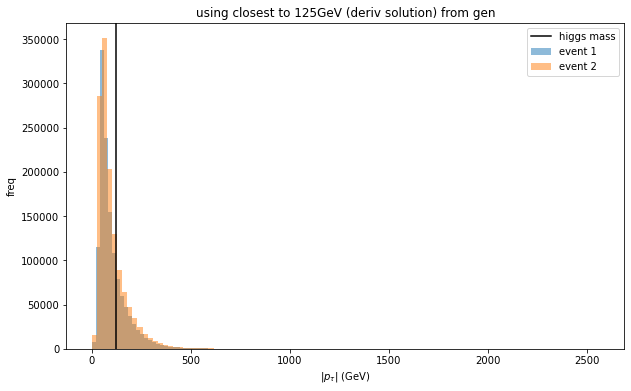

In [78]:
plt.figure(figsize=(10,6))
plt.hist(closest_soln_1_gen_w, bins=100, alpha=0.5, label='event 1')
plt.hist(closest_soln_2_gen_w, bins=100, alpha=0.5, label='event 2')
plt.axvline(125, color='black', label='higgs mass')
plt.legend()
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
plt.title('using closest to 125GeV (deriv solution) from gen')
plt.savefig('./tau_reconstruction/reco_1_gen.png')
plt.show()

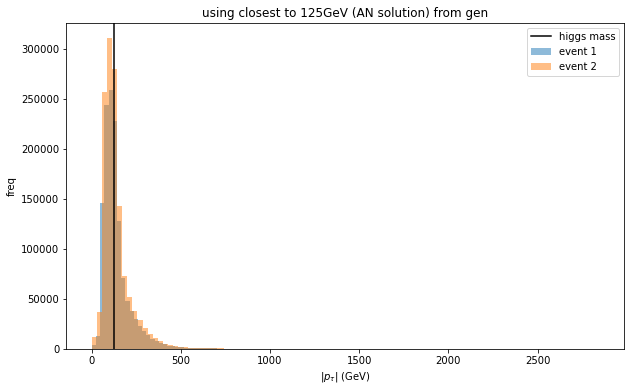

In [86]:
plt.figure(figsize=(10,6))
plt.hist(closest_soln_1_gen_p, bins=100, alpha=0.5, label='event 1')
plt.hist(closest_soln_2_gen_p, bins=100, alpha=0.5, label='event 2')
plt.axvline(125, color='black', label='higgs mass')
plt.legend()
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
plt.title('using closest to 125GeV (AN solution) from gen')
plt.savefig('./tau_reconstruction/reco_2_gen.png')
plt.show()

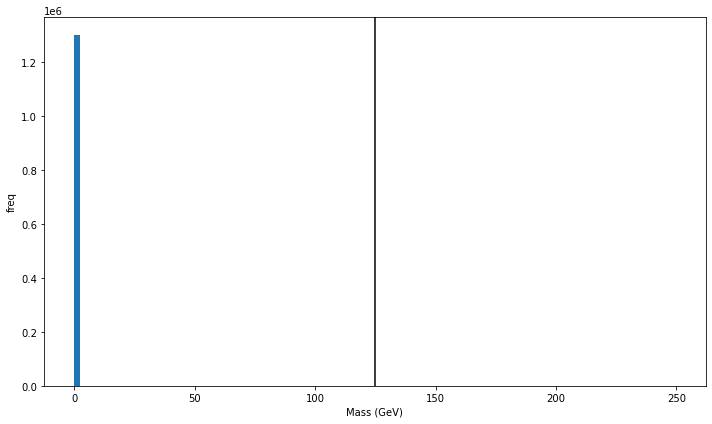

In [39]:
plt.figure(figsize=(10,6))
plt.hist(closest_soln_one_gen, bins=100)
plt.axvline(125, color='black')
plt.xlabel('Mass (GeV)')
plt.ylabel('freq')
plt.tight_layout()
plt.show()

In [42]:
closest_soln_two_1_gen = get_closest_soln(np.array(sol1_gen).T)
closest_soln_two_2_gen = get_closest_soln(np.array(sol2_gen).T)

getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000
getting 0
getting 100000
getting 200000
getting 300000
getting 400000
getting 500000
getting 600000
getting 700000
getting 800000
getting 900000
getting 1000000
getting 1100000
getting 1200000
getting 1300000


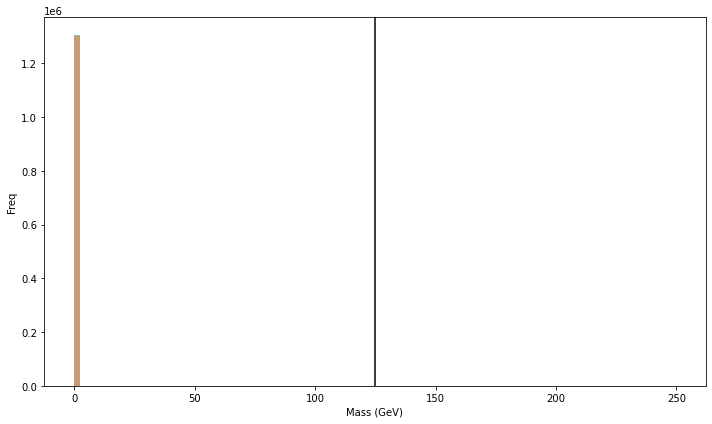

In [43]:
plt.figure(figsize=(10,6))
plt.hist(closest_soln_two_1_gen, bins=100, alpha=0.5, label='event 1')
plt.hist(closest_soln_two_2_gen, bins=100, alpha=0.5, label='event 2')
plt.axvline(125, color='black')
plt.xlabel('Mass (GeV)')
plt.ylabel('Freq')
plt.tight_layout()
plt.show()

### checking what selection method is correct

In [98]:
def get_tau(df):
    pi_1 = Momentum4(df['pi_E_1'], df['pi_px_1'], df['pi_py_1'], df['pi_pz_1'])
    pi2_1 = Momentum4(df['pi2_E_1'], df['pi2_px_1'], df['pi2_py_1'], df['pi2_pz_1'])
    pi3_1 = Momentum4(df['pi3_E_1'], df['pi3_px_1'], df['pi3_py_1'], df['pi3_pz_1'])
    pi_2 = Momentum4(df['pi_E_2'], df['pi_px_2'], df['pi_py_2'], df['pi_pz_2'])
    pi2_2 = Momentum4(df['pi2_E_2'], df['pi2_px_2'], df['pi2_py_2'], df['pi2_pz_2'])
    pi3_2 = Momentum4(df['pi3_E_2'], df['pi3_px_2'], df['pi3_py_2'], df['pi3_pz_2'])
    nu_1 = Momentum4.m_eta_phi_p(np.zeros(len(df["gen_nu_phi_1"])), df["gen_nu_eta_1"], df["gen_nu_phi_1"], df["gen_nu_p_1"])
    nu_2 = Momentum4.m_eta_phi_p(np.zeros(len(df["gen_nu_phi_2"])), df["gen_nu_eta_2"], df["gen_nu_phi_2"], df["gen_nu_p_2"])
    tau_1 = pi_1 + pi3_1 + pi2_1 + nu_1
    tau_2 = pi_2 + pi3_2 + pi2_2 + nu_2
    return tau_1, tau_2, nu_1, nu_2

In [87]:
df.columns

Index(['wt_cp_sm', 'wt_cp_ps', 'wt_cp_mm', 'rand', 'aco_angle_1', 'mva_dm_1',
       'mva_dm_2', 'tau_decay_mode_1', 'tau_decay_mode_2', 'pi_E_1', 'pi_px_1',
       'pi_py_1', 'pi_pz_1', 'pi_E_2', 'pi_px_2', 'pi_py_2', 'pi_pz_2',
       'pi2_E_1', 'pi2_px_1', 'pi2_py_1', 'pi2_pz_1', 'pi3_E_1', 'pi3_px_1',
       'pi3_py_1', 'pi3_pz_1', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2',
       'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 'ip_x_1', 'ip_y_1',
       'ip_z_1', 'ip_x_2', 'ip_y_2', 'ip_z_2', 'sv_x_1', 'sv_y_1', 'sv_z_1',
       'sv_x_2', 'sv_y_2', 'sv_z_2', 'gen_nu_p_1', 'gen_nu_phi_1',
       'gen_nu_eta_1', 'gen_nu_p_2', 'gen_nu_phi_2', 'gen_nu_eta_2'],
      dtype='object')

In [143]:
(df.gen_nu_p_1==-9999).sum()

4926

In [186]:
tau_1, tau_2, nu_1, nu_2 = get_tau(df)

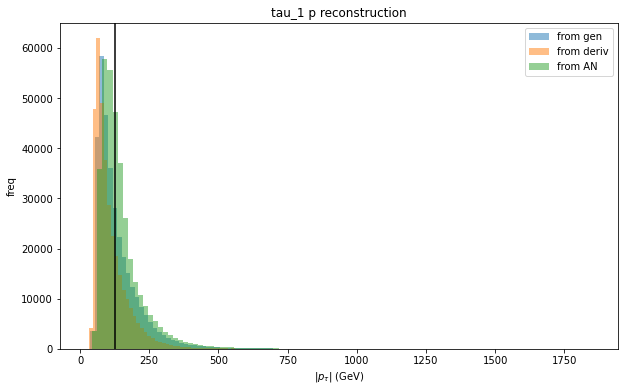

In [160]:
plt.figure(figsize=(10,6))
plt.axvline(125, color='black')
plt.hist(tau_1.p, bins=100, alpha=0.5, label='from gen')
plt.hist(closest_w_1, bins=100, alpha=0.5, label='from deriv')
plt.hist(closest_p_1, bins=100, alpha=0.5, label='from AN')
plt.title('tau_1 p reconstruction')
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
plt.legend()
plt.savefig('./tau_reconstruction/tau_1.png')
plt.show()

In [178]:
closest_w_1_max = get_closest_soln(np.array(sol1_w).T, mode=1)
closest_w_1_min = get_closest_soln(np.array(sol1_w).T, mode=2)
closest_p_1_max = get_closest_soln(np.array(sol1_p).T, mode=1)
closest_p_1_min = get_closest_soln(np.array(sol1_p).T, mode=2)
# closest_w_2_max = get_closest_soln(np.array(sol2_w).T, mode=1)

getting 0
getting 100000
getting 200000
getting 300000
getting 0
getting 100000
getting 200000
getting 300000
getting 0
getting 100000
getting 200000
getting 300000
getting 0
getting 100000
getting 200000
getting 300000


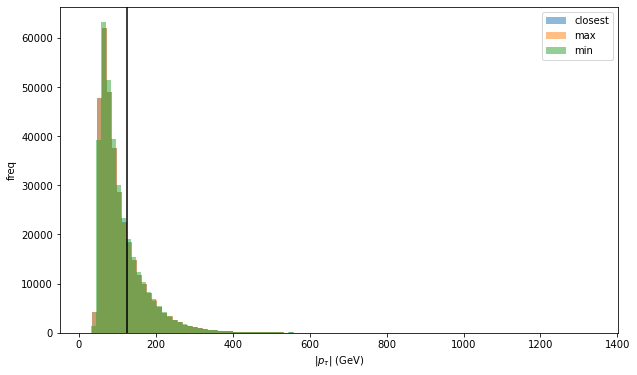

In [168]:
plt.figure(figsize=(10,6))
plt.axvline(125, color='black')
plt.hist(closest_w_1, bins=100, alpha=0.5, label='closest')
plt.hist(closest_w_1_max, bins=100, alpha=0.5, label='max')
plt.hist(closest_w_1_min, bins=100, alpha=0.5, label='min')
# plt.title('tau_1 p reconstruction')
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
plt.legend()
plt.show()

In [217]:
import scipy.stats as sps
from collections import Counter
def profileplot_plain(x, y, xlabel='', ylabel='', bins=100, plot_range=None):
    means_result = sps.binned_statistic(x, [y, y**2], bins=bins, statistic='mean', range=plot_range)
    means, means2 = means_result.statistic
    standard_deviations = np.sqrt(means2 - means**2)
    bin_edges = means_result.bin_edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#     plt.figure()
    plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.', capsize=2)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
def profileplot(x, y, xlabel='', ylabel='', bins=100, mode=0, label=''):
    means_result = sps.binned_statistic(x, [y, y**2], bins=bins, statistic='mean')
    means, means2 = means_result.statistic
    standard_deviations = np.sqrt(means2 - means**2)
    bin_edges = means_result.bin_edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    # remove NaNs and single count bins
    nan_idx = np.argwhere(np.isnan(means) ).flatten()
    zero_idx = np.argwhere(standard_deviations == 0)
    to_remove = np.union1d(nan_idx, zero_idx)
    means = np.delete(means, to_remove, None)
    bin_centers = np.delete(bin_centers, to_remove, None)
    standard_deviations = np.delete(standard_deviations, to_remove, None)
    count = Counter(means_result.binnumber)
    to_remove_set = set(to_remove)
    N = []
    for i in range(1,bins+1):
        if i-1 in to_remove_set:
            continue
        if i in count:
            N.append(count[i])
    # print(to_remove.shape)
    # print(bin_centers.shape, means.shape)
    yerr = standard_deviations/np.sqrt(N)
    # yerr = standard_deviations
    # fitting
    # print(bin_centers, means, yerr)
#     plt.figure()
    plt.errorbar(x=bin_centers, y=means, yerr=yerr, linestyle='none', marker='.', capsize=2, label=label)
    if mode == 1:
        fit, cov = np.polyfit(bin_centers, means, 1, w=1/yerr, cov=True)
        p = np.poly1d(fit)
        print(f"Fit params: {fit[0]}, {fit[1]}")
        print(f"Diag of cov: {cov[0][0]} , {cov[1][1]}")
        plt.plot(bin_centers, p(bin_centers))
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     plt.tight_layout()

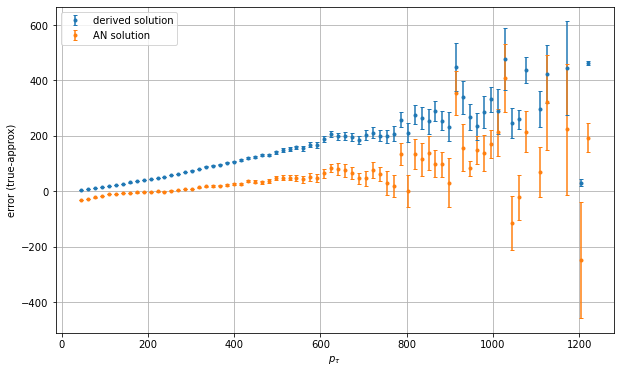

In [219]:
plt.figure(figsize=(10,6))
# profileplot_plain(tau_1.p, err_1)
profileplot(tau_1.p, tau_1.p-closest_w_1, label='derived solution')
profileplot(tau_1.p, tau_1.p-closest_p_1, label='AN solution')
plt.grid()
plt.legend()
plt.xlabel(r'$p_\tau$')
plt.ylabel('error (true-approx)')
plt.savefig('./tau_reconstruction/error_1.png')
plt.show()

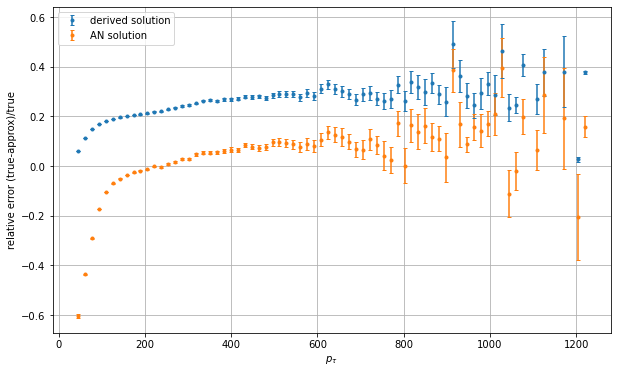

In [221]:
plt.figure(figsize=(10,6))
# profileplot_plain(tau_1.p, err_1)
profileplot(tau_1.p, (tau_1.p-closest_w_1)/tau_1.p, label='derived solution')
profileplot(tau_1.p, (tau_1.p-closest_p_1)/tau_1.p, label='AN solution')
plt.grid()
plt.legend()
plt.xlabel(r'$p_\tau$')
plt.ylabel('relative error (true-approx)/true')
plt.savefig('./tau_reconstruction/rel_error_1.png')
plt.show()

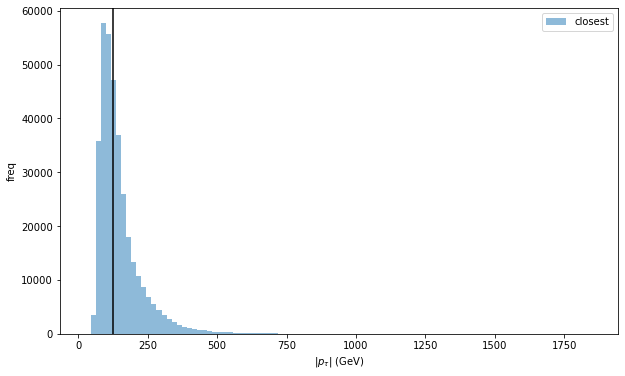

In [183]:
plt.figure(figsize=(10,6))
plt.axvline(125, color='black')
plt.hist(closest_p_1, bins=100, alpha=0.5, label='closest')
plt.hist(closest_p_1_max, bins=100, alpha=0.5, label='max')
plt.hist(closest_p_1_min, bins=100, alpha=0.5, label='min')
# plt.title('tau_1 p reconstruction')
plt.xlabel(r'$|p_\tau|$ (GeV)')
plt.ylabel('freq')
plt.legend()
plt.show()

In [15]:
a = np.array([1,2,3])
b = np.arange(1,7).reshape(3,2)

In [24]:
a,b

(array([1, 2, 3]),
 array([[1, 2],
        [3, 4],
        [5, 6]]))

In [26]:
np.multiply(a[:, None], b)

array([[ 1,  2],
       [ 6,  8],
       [15, 18]])

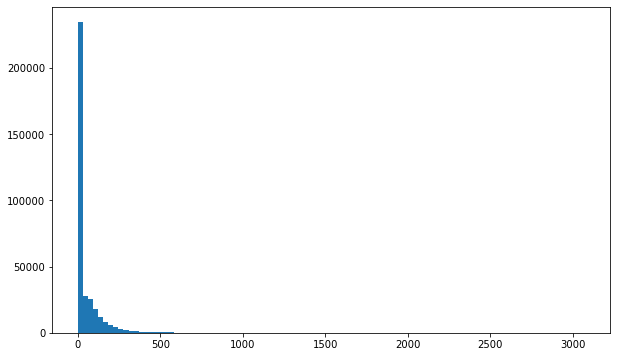

In [181]:
plt.figure(figsize=(10,6))
plt.hist(sol1_p[0]- sol1_p[1], bins=100)
plt.show()